In [1]:
# import python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import csv file
df = pd.read_csv("Diwali Sales Data.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [7]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
# change data type
df['Amount'] = df['Amount'].astype(int)

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
for col in df.columns:
    display(col)

'User_ID'

'Cust_name'

'Product_ID'

'Gender'

'Age Group'

'Age'

'Marital_Status'

'State'

'Zone'

'Occupation'

'Product_Category'

'Orders'

'Amount'

In [12]:
# changing columns to the lower case
df.columns = map(str.lower, df.columns)

In [13]:
# replace the space by underscore
df.columns = df.columns.str.replace(' ', '_', regex=True)

# Exploratory Data Analysis

### Gender

In [14]:
df.columns

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age_group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

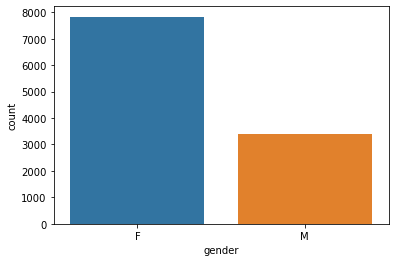

In [15]:
sns.countplot(x = 'gender', data =df)

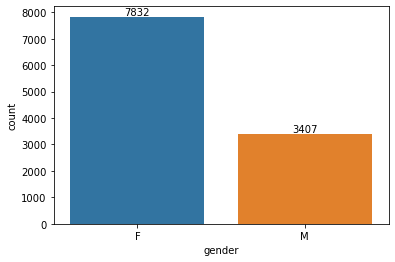

In [16]:
# plotting a bar chart for gender and it's count
ax = sns.countplot(x = 'gender', data =df)
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
df.groupby(['gender'], as_index = False)['amount'].sum().sort_values(by ='amount', ascending = False)

,gender,amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='gender', ylabel='amount'>

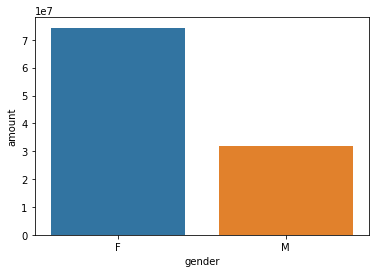

In [18]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['gender'], as_index = False)['amount'].sum().sort_values(by ='amount', ascending = False)
sns.barplot(x = 'gender', y = 'amount', data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than man.

### Age

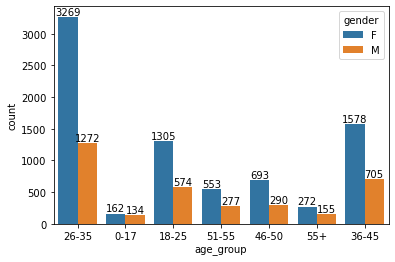

In [19]:
ax = sns.countplot(data = df, x = 'age_group', hue = 'gender')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='age_group', ylabel='amount'>

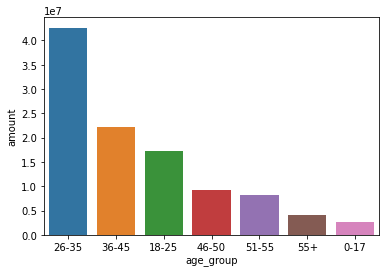

In [20]:
# Total Amount vs Age Group
sales_age = df.groupby(['age_group'], as_index = False)['amount'].sum().sort_values(by ='amount', ascending = False)
sns.barplot(x = 'age_group', y = 'amount', data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

### State

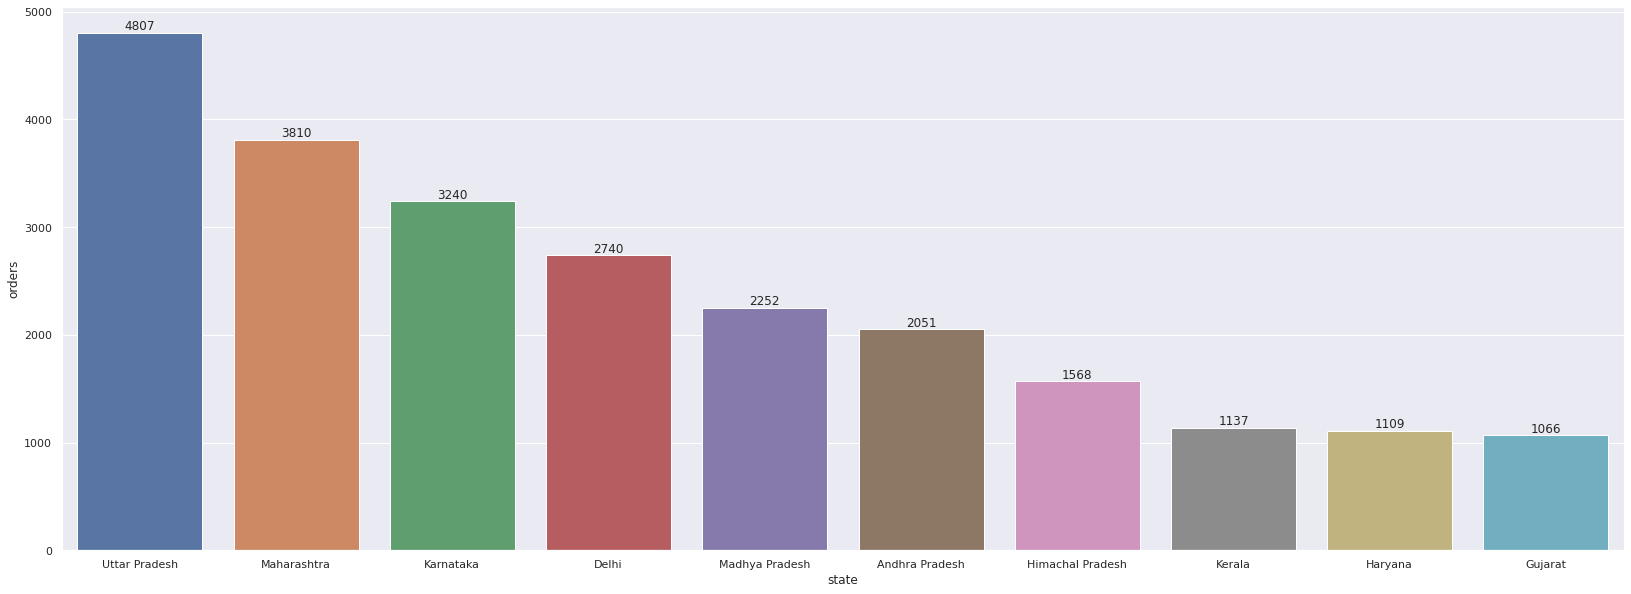

In [21]:
# We analyze the number of orders from top 10 states.
sales_state = df.groupby(['state'], as_index = False)['orders'].sum().sort_values(by ='orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(28,10)})
ax = sns.barplot(x = 'state', y = 'orders', data = sales_state)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='state', ylabel='amount'>

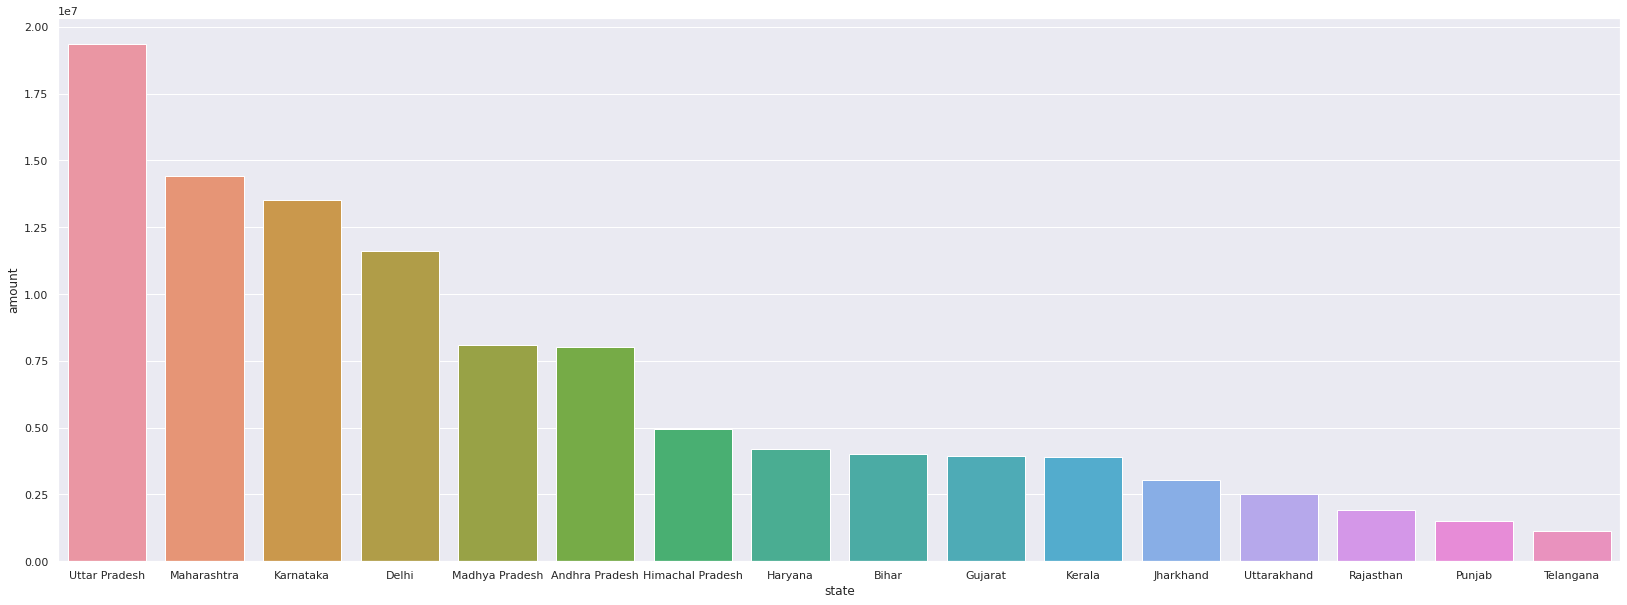

In [22]:
# We analyze the total sales amount from top 10 states.
sales_state = df.groupby(['state'], as_index = False)['amount'].sum().sort_values(by ='amount', ascending = False)
sns.set(rc={'figure.figsize':(28,10)})
sns.barplot(x = 'state', y = 'amount', data = sales_state)

From above graphs we can see that the top states in terms of orders and total sales amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### Maritial Status

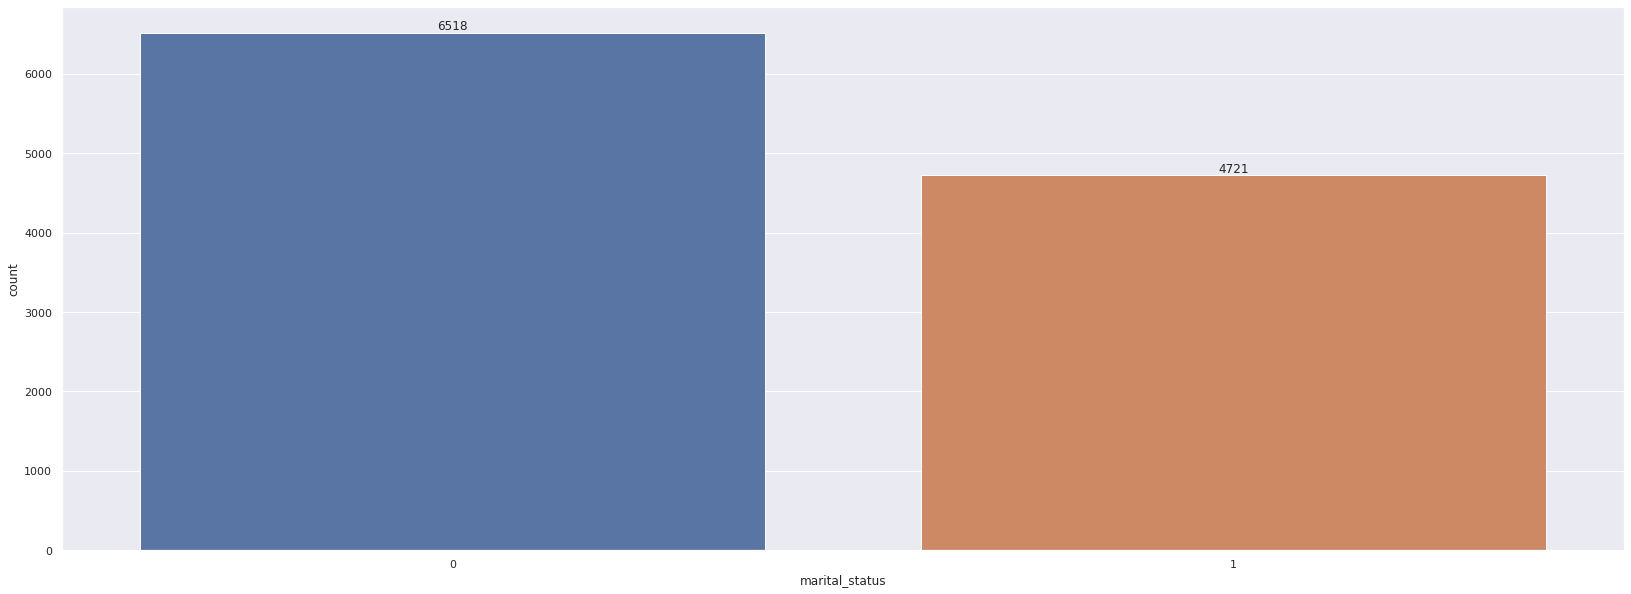

In [23]:
# We analyze the distribution of buyers by maritial status
ax = sns.countplot(data = df, x = 'marital_status')
sns.set(rc={'figure.figsize':(5,7)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='marital_status', ylabel='amount'>

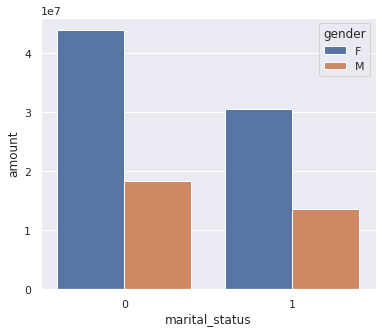

In [24]:
# We analyze the total sales amount by maritial status and gender
sales_state = df.groupby(['marital_status', 'gender'], as_index = False)['amount'].sum().sort_values(by ='amount', ascending = False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'marital_status', y = 'amount', hue = 'gender')

From above graphs we can see that the married women showing a higher purchasing power

### Occupation

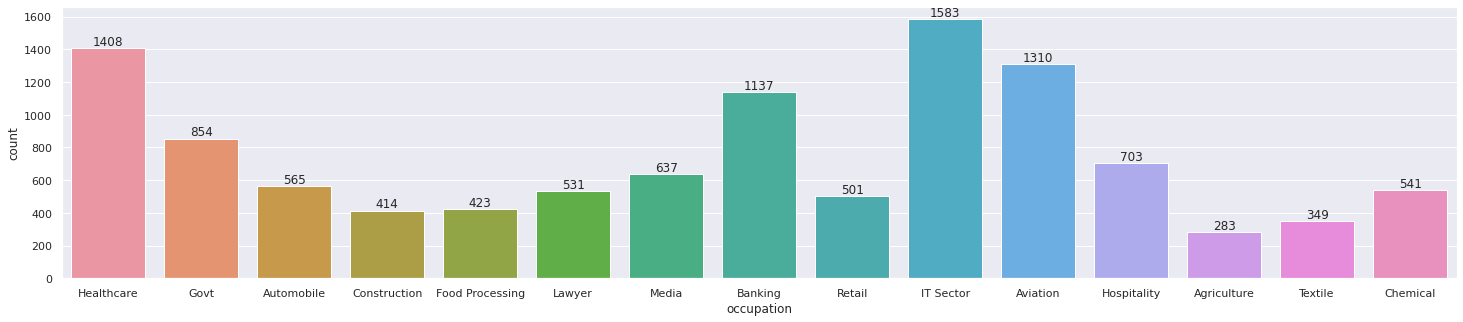

In [25]:
# We analyze the distribution of buyers by the occupation
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='occupation', ylabel='amount'>

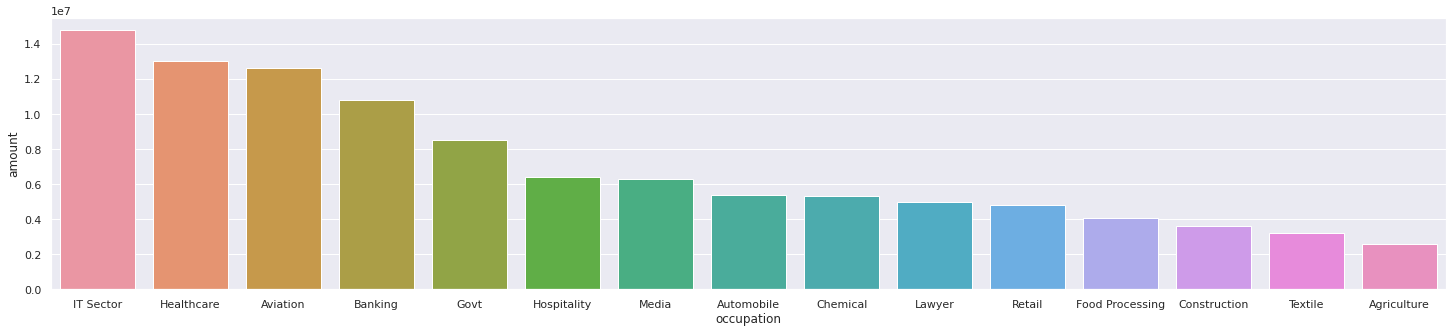

In [26]:
# We analyze the total sales ammount by the occupation.
sales_state = df.groupby(['occupation'], as_index = False)['amount'].sum().sort_values(by ='amount', ascending = False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'occupation', y = 'amount', data = sales_state)

The graph reveals most of employees are working in IT, Healthcare, Aviation sector.

### Product Category

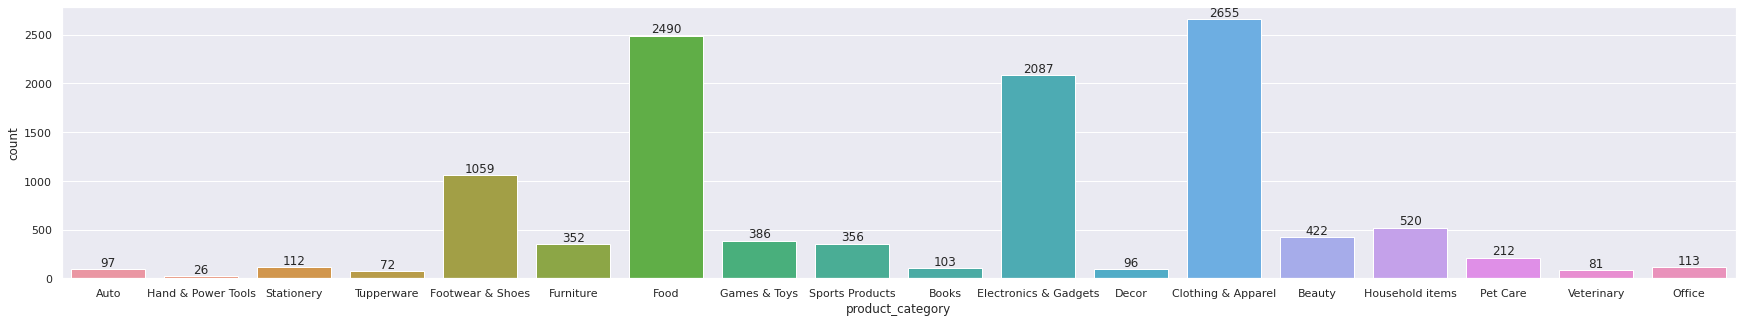

In [27]:
# We analyze the distribution of orders by product category.
sns.set(rc={'figure.figsize':(30,5)})
ax = sns.countplot(data = df, x = 'product_category')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='product_category', ylabel='amount'>

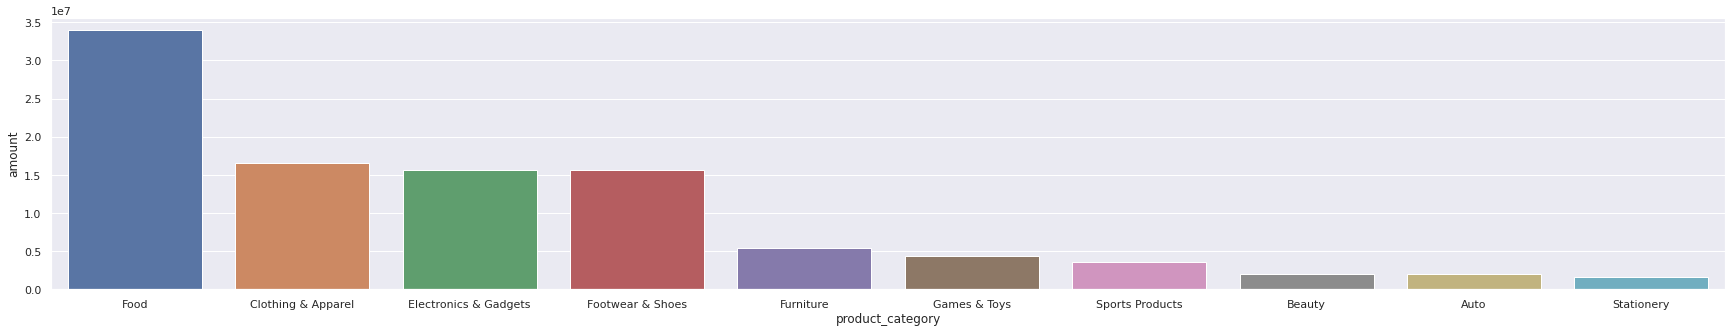

In [28]:
# We analyze the total sales amount by product category
sales_state = df.groupby(['product_category'], as_index = False)['amount'].sum().sort_values(by ='amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(x = 'product_category', y = 'amount', data = sales_state)

Certain top 10 product categories are more popular and generated higher sales.

### Conclusion

This analysis provides a comprehensive overview of the Diwali Sales data, Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category. The visualizations and summary statistics help in understanding the trends and patterns in the data, which can be useful for strategic decision making.